# Lab:  Simple linear regression

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model. The lab use the Boston housing data set, a widely-used machine learning data set for illustrating basic concepts.  

## Loading the data

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc.  Since the variables are easy to understand, the data set is ideal for learning basic concepts in machine learning. The data can be loaded using








In [97]:
#    from sklearn.datasets import load_boston
#    boston_dataset = load_boston()

In the lab, you will complete all the code marked `TODO`. 

In [98]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston_dataset = load_boston()
# TODO:  Complete the code
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['PRICE'] = boston_dataset.target
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

Display the first six rows of the data frame

In [99]:
# TODO
# TODO
boston.head(6)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
5     18.7  394.12   5.21   28.7

## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [100]:
# TODO
num_samples,num_attributes=boston.shape
print("Number of Samples are",num_samples)
print("Number of Attributes are",num_attributes)

Number of Samples are 506
Number of Attributes are 14


Create a response vector `y` with the values in the column `PRICE`.  The vector `y` should be a 1D `numpy.array` structure.

In [101]:
# TODO
y = boston['PRICE']

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $40k. (You may realize this is very cheap.  Prices have gone up a lot since the 1970s!).   Create print statements of the form:

    The mean house price is xx.yy thousands of dollars.
    Only x.y percent are above $40k.

In [102]:
# TODO
print("The mean house price is",np.mean(y),"thousands of dollars")
print("Only", (np.count_nonzero(y> 40)/y.shape[0])*100,"percent are above $40k.")


The mean house price is 22.532806324110698 thousands of dollars
Only 6.126482213438735 percent are above $40k.


## Visualizing the Data

Python's `matplotlib` has very good routines for plotting and visualizing data that closely follows the format of MATLAB programs.  You can load the `matplotlib` package with the following commands.

In [103]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each region.

In [104]:
# TODO
x = boston["RM"]

Create a scatter plot of the price vs. the `RM` attribute.  Make sure your plot has grid lines and label the axes with reasonable labels so that someone else can understand the plot.

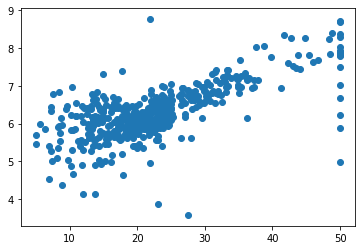

In [105]:
# TODO
plt.scatter(y,x)
plt.show()

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit. Use the formulae given in the class, to compute the parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x + \epsilon$$ as well as the coefficient of determination $R^2$.

In [106]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = beta0 + beta1*x, 
    The function returns beta0, beta1 and rsq, where rsq is the coefficient of determination.
    """
    # TODO complete the following code
    # beta0 = ...
    # beta1 = ...
    # rsq = ...
    xm = np.mean(x)
    ym = np.mean(y)
    syy = np.mean((y-ym)**2)
    syx = np.mean((y-ym)*(x-xm))
    sxx = np.mean((x-xm)**2)
    beta1 = syx/sxx
    beta0 = ym - beta1*xm
    rsq =(syx)**2/sxx/syy
    
    return beta0, beta1, rsq

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `rsq` for the linear model of price vs. number of rooms.

In [107]:
# TODO
beta0, beta1, rsq=fit_linear(x,y)
print(beta0, beta1, rsq)

-34.67062077643857 9.102108981180303 0.4835254559913335


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `xp` from say 4 to 9, computing the linear predicted values `yp` on those points and plotting `yp` vs. `xp` on top of the above plot.

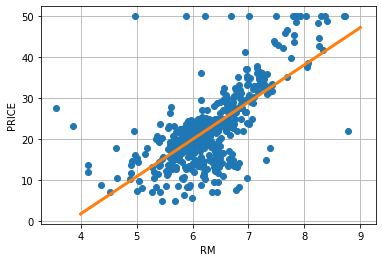

In [108]:
# TODO

xp = np.array([4,9])          
yp = beta1*xp + beta0

plt.plot(x,y,'o')                    # Plot the data points
plt.plot(xp,yp,'-',linewidth=3)  # Plot the regression line
plt.xlabel("RM")
plt.ylabel('PRICE')
plt.grid(True)

# Compute coefficients of determination

We next compute the $R^2$ values for all the predictors and output the values in a table. Your table should look like the following, where each the first column is the attribute name and the second column is the $R^2$ value.

    CRIM        0.151
    ZN          0.130
    INDUS       0.234
    ...         ...

To index over the set of colunms in the dataframe `df`, you can either loop over the items in the `names` lists (skipping over the final name `PRICE`) or loop over integer indices and use the method, `df.iloc`.

In [109]:
# TODO

In [110]:
result=[]
for i in boston:
    a,b,c=fit_linear(boston[i],y)
    result.append([i,c])

In [111]:
pd.DataFrame(result)

0         1
0      CRIM  0.150780
1        ZN  0.129921
2     INDUS  0.233990
3      CHAS  0.030716
4       NOX  0.182603
5        RM  0.483525
6       AGE  0.142095
7       DIS  0.062464
8       RAD  0.145639
9       TAX  0.219526
10  PTRATIO  0.257847
11        B  0.111196
12    LSTAT  0.544146
13    PRICE  1.000000